//Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objects as gb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

//Reading The file

In [3]:
df=pd.read_csv('plane Price.csv')

//Changing into float

In [4]:
df['All eng rate of climb']=df['All eng rate of climb'].str.replace(',','',regex=False)
df['All eng rate of climb']=df['All eng rate of climb'].str.replace('w/3bld','',regex=False)
df['All eng rate of climb']=pd.to_numeric(df['All eng rate of climb'])

In [5]:
df['Landing over 50ft']=df['Landing over 50ft'].str.replace(',','',regex=False)
df['Landing over 50ft']=df['Landing over 50ft'].str.replace('Orig','',regex=False)
df['Landing over 50ft']=pd.to_numeric(df['Landing over 50ft'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               517 non-null    object 
 1   Engine Type              517 non-null    object 
 2   HP or lbs thr ea engine  517 non-null    object 
 3   Max speed Knots          497 non-null    object 
 4   Rcmnd cruise Knots       507 non-null    float64
 5   Stall Knots dirty        502 non-null    float64
 6   Fuel gal/lbs             517 non-null    int64  
 7   All eng rate of climb    513 non-null    float64
 8   Eng out rate of climb    491 non-null    float64
 9   Takeoff over 50ft        492 non-null    float64
 10  Landing over 50ft        516 non-null    float64
 11  Empty weight lbs         516 non-null    object 
 12  Length ft/in             517 non-null    object 
 13  Wing span ft/in          517 non-null    object 
 14  Range N.M.               4

In [7]:
df['HP or lbs thr ea engine']=df['HP or lbs thr ea engine'].str.replace(',','',regex=False)
df['HP or lbs thr ea engine']=df['HP or lbs thr ea engine'].str.replace('wet','',regex=False)
df['HP or lbs thr ea engine']=df['HP or lbs thr ea engine'].str.replace(' dry','',regex=False)
df['HP or lbs thr ea engine']=pd.to_numeric(df['HP or lbs thr ea engine'])

In [8]:
df['Max speed Knots']=df['Max speed Knots'].str.replace('.','',regex=False)
df['Max speed Knots']=df['Max speed Knots'].str.replace(' Mach','',regex=False)
df['Max speed Knots']=pd.to_numeric(df['Max speed Knots'])

In [9]:
df['Empty weight lbs']=df['Empty weight lbs'].str.replace(',','',regex=False)
df['Empty weight lbs']=pd.to_numeric(df['Empty weight lbs'])

In [10]:
df['Length ft/in']=df['Length ft/in'].str.replace(',','',regex=False)
df['Length ft/in']=df['Length ft/in'].str.replace('/','',regex=False)
df['Length ft/in']=df['Length ft/in'].str.replace('NC','',regex=False)
df['Length ft/in']=df['Length ft/in'].str.replace('Orig','',regex=False)
df['Length ft/in']=pd.to_numeric(df['Length ft/in'])

In [11]:
df['Wing span ft/in']=df['Wing span ft/in'].str.replace(',','',regex=False)
df['Wing span ft/in']=df['Wing span ft/in'].str.replace('/','',regex=False)
df['Wing span ft/in']=df['Wing span ft/in'].str.replace('NC','',regex=False)
df['Wing span ft/in']=df['Wing span ft/in'].str.replace('Orig','',regex=False)
df['Wing span ft/in']=pd.to_numeric(df['Wing span ft/in'])

In [12]:
df['Range N.M.']=df['Range N.M.'].str.replace(',','',regex=False)
df['Range N.M.']=pd.to_numeric(df['Range N.M.'])

In [13]:
df['Engine Type'].unique()

array(['Piston', 'Propjet', 'Jet', 'piston'], dtype=object)

In [14]:
setattr(df['Engine Type'],'Piston',0);
setattr(df['Engine Type'],'Propjet',1);
setattr(df['Engine Type'],'Jet',2);
setattr(df['Engine Type'],'piston',3);

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               517 non-null    object 
 1   Engine Type              517 non-null    object 
 2   HP or lbs thr ea engine  517 non-null    int64  
 3   Max speed Knots          497 non-null    float64
 4   Rcmnd cruise Knots       507 non-null    float64
 5   Stall Knots dirty        502 non-null    float64
 6   Fuel gal/lbs             517 non-null    int64  
 7   All eng rate of climb    513 non-null    float64
 8   Eng out rate of climb    491 non-null    float64
 9   Takeoff over 50ft        492 non-null    float64
 10  Landing over 50ft        516 non-null    float64
 11  Empty weight lbs         516 non-null    float64
 12  Length ft/in             514 non-null    float64
 13  Wing span ft/in          514 non-null    float64
 14  Range N.M.               4

//Relation Analysis

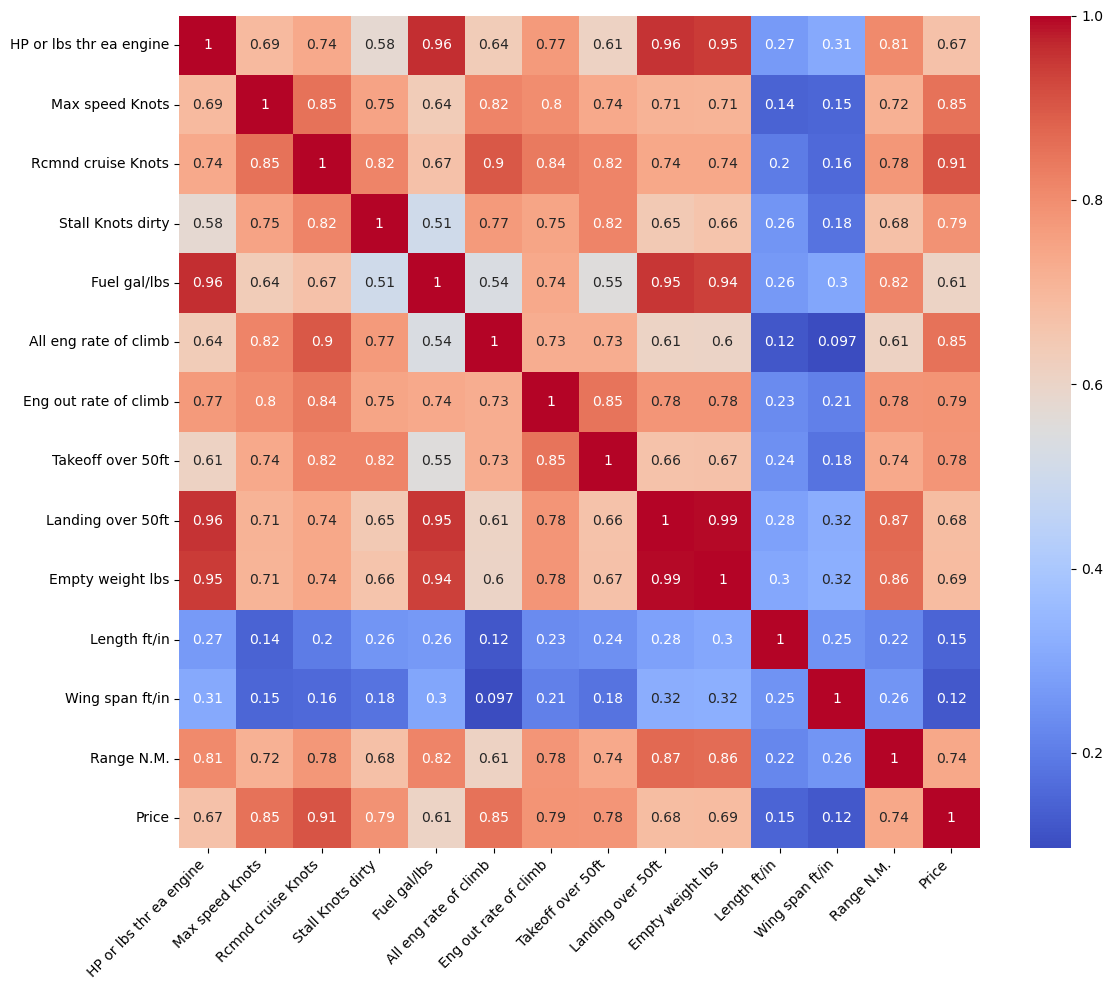

In [23]:
#dataplot=sns.heatmap(df.corr(numeric_only=True))
#plt.show
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

//Filtering Null Values Out

In [24]:
x=df[['Rcmnd cruise Knots','All eng rate of climb','Max speed Knots']]
p=df['Price']

In [25]:
df.duplicated().sum()

0

In [26]:
df['All eng rate of climb'].fillna(df['All eng rate of climb'].mean(),inplace=True)
df['Rcmnd cruise Knots'].fillna(df['Rcmnd cruise Knots'].mean(),inplace=True)
df['Max speed Knots'].fillna(df['Max speed Knots'].mean(),inplace=True)
df['Stall Knots dirty'].fillna(df['Stall Knots dirty'].mean(),inplace=True)
df['Price'].fillna(df['Price'].mean(),inplace=True)

In [27]:
df.isnull().sum()

Model Name                  0
Engine Type                 0
HP or lbs thr ea engine     0
Max speed Knots             0
Rcmnd cruise Knots          0
Stall Knots dirty           0
Fuel gal/lbs                0
All eng rate of climb       0
Eng out rate of climb      26
Takeoff over 50ft          25
Landing over 50ft           1
Empty weight lbs            1
Length ft/in                3
Wing span ft/in             3
Range N.M.                 18
Price                       0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               517 non-null    object 
 1   Engine Type              517 non-null    object 
 2   HP or lbs thr ea engine  517 non-null    int64  
 3   Max speed Knots          517 non-null    float64
 4   Rcmnd cruise Knots       517 non-null    float64
 5   Stall Knots dirty        517 non-null    float64
 6   Fuel gal/lbs             517 non-null    int64  
 7   All eng rate of climb    517 non-null    float64
 8   Eng out rate of climb    491 non-null    float64
 9   Takeoff over 50ft        492 non-null    float64
 10  Landing over 50ft        516 non-null    float64
 11  Empty weight lbs         516 non-null    float64
 12  Length ft/in             514 non-null    float64
 13  Wing span ft/in          514 non-null    float64
 14  Range N.M.               4

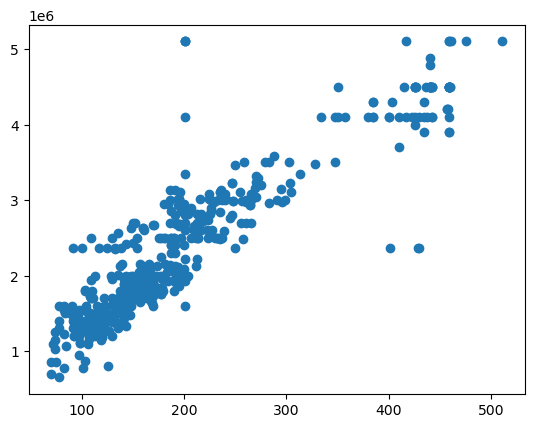

In [29]:
plt.scatter(df['Rcmnd cruise Knots'],df['Price'])

In [30]:
x_train,x_test,p_train,p_test = train_test_split(x,p,test_size=0.2)

In [31]:
len(x_train)

413

In [32]:
len(x_test)

104

In [33]:
clf = LinearRegression()

In [34]:
clf.fit(x_train,p_train)

LinearRegression()

In [35]:
clf.predict(x_test)

array([1540238.60414558, 1991649.68213892, 2675974.36406977,
       1228633.19621437, 1825357.92983355, 2661589.69394921,
       1512049.83154961, 2205214.97682949, 2129350.9614728 ,
       2496396.43371462, 2027767.85921429, 2095801.97922523,
       1929208.12777889, 1292483.15301429, 2142789.95318411,
       4827949.59106317, 1630492.23527135, 2201471.09157342,
       2306104.63137303, 2543178.74998858, 1924488.33761707,
       2268934.44313534, 2287521.07109298, 2630637.66838639,
       1492532.08582556, 2897858.71804459, 1618533.74551318,
       1339340.5443782 , 1785343.33014328, 4663847.99927993,
       2258540.75911481, 1314102.42388699, 1447283.20762904,
       2971940.40860987, 2200856.90989353, 1841508.48613177,
       4760376.61131083, 2237044.73800965, 4729214.19569457,
       2807561.01252308, 2027482.38288888, 2558784.95984947,
       1693381.87881446, 1627023.93504366, 2537901.58021009,
       2291074.13560967, 3189745.85241715, 2331352.64316128,
       2233307.49217121,

In [36]:
p_test

38     1275000.0
302    2000000.0
6      2500000.0
4      1250000.0
277    1480000.0
         ...    
441    1300000.0
372    1390000.0
347    1550000.0
128    1830000.0
445    2000000.0
Name: Price, Length: 104, dtype: float64

In [37]:
clf.score(x_test,p_test)

0.8404310423704334